In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

After importing all the necessary libraries, I have read all the datasets using pandas.

In [4]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

The first two rows are of the cab dataset and the last two rows are of customer and transaction dataset respectively. The cab data and transaction data has the common column - trnsaction id. So an inner join can be performed to create a new dataset. The new dataset will have a common column with customer dataset which is the customer id. These two datasets can also be merged using the inner join.

In [42]:
cab.head(), customer_id.head(), transaction_id.head()

(   Transaction ID Date of Travel   Company        City  KM Travelled  \
 0        10000011     08-01-2016  Pink Cab  ATLANTA GA         30.45   
 1        10000012     06-01-2016  Pink Cab  ATLANTA GA         28.62   
 2        10000013     02-01-2016  Pink Cab  ATLANTA GA          9.04   
 3        10000014     07-01-2016  Pink Cab  ATLANTA GA         33.17   
 4        10000015     03-01-2016  Pink Cab  ATLANTA GA          8.73   
 
    Price Charged  Cost of Trip  
 0         370.95       313.635  
 1         358.52       334.854  
 2         125.20        97.632  
 3         377.40       351.602  
 4         114.62        97.776  ,
    Customer ID Gender  Age  Income (USD/Month)
 0        29290   Male   28               10813
 1        27703   Male   27                9237
 2        28712   Male   53               11242
 3        28020   Male   23               23327
 4        27182   Male   33                8536,
    Transaction ID  Customer ID Payment_Mode
 0        10000011   

In [43]:
merged_data = transaction_id.merge(customer_id, on='Customer ID', how='inner')
merged_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


The first five values of the final dataset after merging the three datasets are give below.

In [44]:
data = merged_data.merge(cab, on='Transaction ID', how = 'inner' )
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


The city dataset has an extra city recorded than the merged dataset. The city is San Francisco. The city dataset will be later utilised if needeed.

In [45]:
city['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [46]:
data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

The categorical and numerical data have been separated and recorded in different varibles for analysing.

In [47]:
col1 = ['Age', 'Income (USD/Month)', 'KM Travelled', 'Price Charged', 'Cost of Trip']
num_data = data[col1]
col2 = ['Payment_Mode', 'Gender', 'Company', 'City']
cat_data = data[col2]

The name of the two companies are Pink Cab and Yellow Cab.

In [48]:
data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

# CLEANING THE DATASET ****
1. Missing values
2. Removing Duplicates 

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


There are no missing values in the dataset and retaining all the columns since it will be useful for analysis.

In [50]:
data.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000


In [51]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21056\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,-0.016912,-0.001267,-0.001570,-0.001429,-0.052902,-0.003462
Customer ID,-0.016912,1.000000,-0.004735,-0.013608,0.000389,-0.177324,0.003077
Age,-0.001267,-0.004735,1.000000,0.003907,-0.000369,-0.003084,-0.000189
Income (USD/Month),-0.001570,-0.013608,0.003907,1.000000,-0.000544,0.003228,-0.000633
KM Travelled,-0.001429,0.000389,-0.000369,-0.000544,1.000000,0.835753,0.981848
Price Charged,-0.052902,-0.177324,-0.003084,0.003228,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,0.003077,-0.000189,-0.000633,0.981848,0.859812,1.000000


There is a positve correlation between kilometers travelled, price charged and cost of trip. 

# **MAXIMUM CAB USERS AT PARTICULAR TIME PERIOD**

In [52]:
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'],  format="%d-%m-%Y")
data['Year'] = data['Date of Travel'].dt.year 
data['Month'] = data['Date of Travel'].dt.month 
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4


Dropping the Date of Travel column

In [53]:
data = data.drop(['Date of Travel'] , axis =1)

In [54]:
columns = data.columns

In [55]:
for i in data.columns:
    if ' ' in i:
        new_col_name = i.replace(' ', '_')
        data.rename(columns={i: new_col_name}, inplace=True)

In [57]:
monthly_trans = data.groupby('Month').Transaction_ID.count()
monthly_trans.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

<Axes: xlabel='Month'>

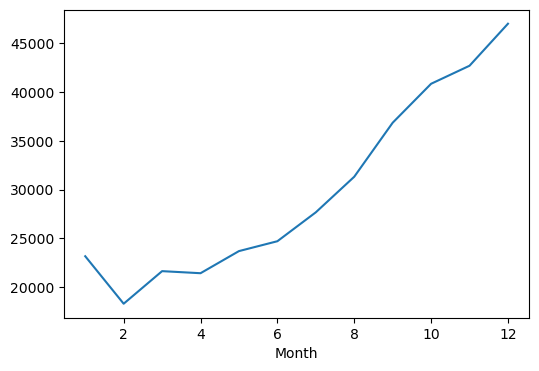

In [58]:
plt.figure(figsize=(6,4))
sns.lineplot(data = monthly_trans, x= monthly_trans.index, y = monthly_trans.values )

The graph indicates that both the cab comapnies have seen the maximum number of customers during November and December which is possible. November and Decmber are the holiday months of United States of America and also owing to the cold weather, people tend to prefer cabs to get tp their destinations. 

In [59]:
yearly_trans = data.groupby('Year').Transaction_ID.count()
yearly_trans

Year
2016    107319
2017    128510
2018    123563
Name: Transaction_ID, dtype: int64

<Axes: xlabel='Year'>

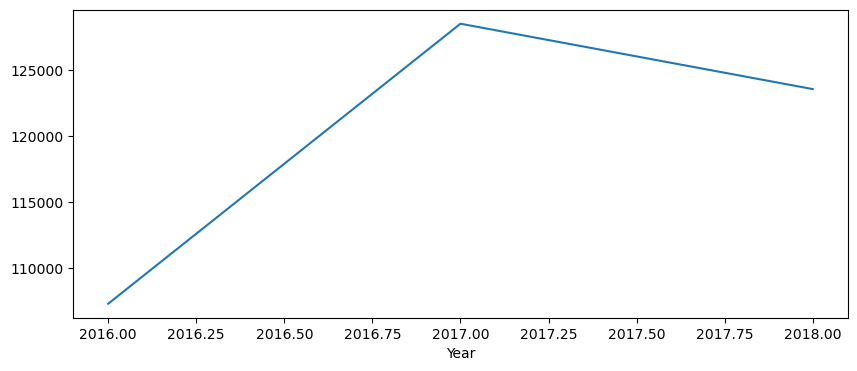

In [60]:
plt.figure(figsize=(10,4))
sns.lineplot(data = yearly_trans, x= yearly_trans.index, y = yearly_trans.values)

Year also has an affect on the number of customers, the year 2017 yeallow cab has seen the most cab customers.

# MARGIN PROPORTIONALITY RELATIONSHIP WITH NUMBER OF CUSTOMERS****

Margin proportionality relates percentage profit of a sevice to its price. It is caluculated by subtracting price charged from cost of trip. 

In [61]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age',
       'Income_(USD/Month)', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month'],
      dtype='object')

In [62]:
data['Profit'] = data['Price_Charged'] - data['Cost_of_Trip']

In [63]:
mean_profit = data.groupby(['Company','Year']).Profit.mean()
mean_profit.item

<bound method IndexOpsMixin.item of Company     Year
Pink Cab    2016     68.321819
            2017     67.070839
            2018     53.229689
Yellow Cab  2016    169.347821
            2017    168.817057
            2018    143.416122
Name: Profit, dtype: float64>

[Text(0, 0, 'Pink Cab-2016'),
 Text(1, 0, 'Pink Cab-2017'),
 Text(2, 0, 'Pink Cab-2018'),
 Text(3, 0, 'Yellow Cab-2016'),
 Text(4, 0, 'Yellow Cab-2017'),
 Text(5, 0, 'Yellow Cab-2018')]

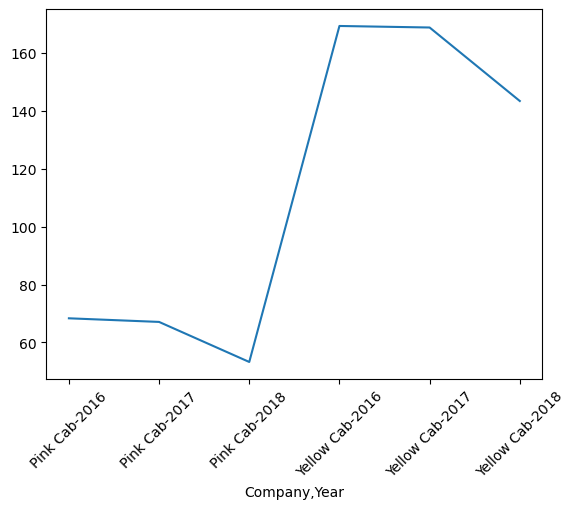

In [64]:
ax = mean_profit.plot()
ax.set_xticks(range(len(mean_profit)))
ax.set_xticklabels(["%s-%02d" % item for item in mean_profit.index.tolist()],rotation=45, ha='center')

The yellow cab has higher average profit compared to the pink Cab in the years 2016 and 2017.

# Profits vs number of customers****

In [65]:
result = data.groupby('Month').agg({'Transaction_ID': 'count', 'Profit': 'mean'})
result.corr()

,Transaction_ID,Profit
Transaction_ID,1.000000,-0.678518
Profit,-0.678518,1.000000


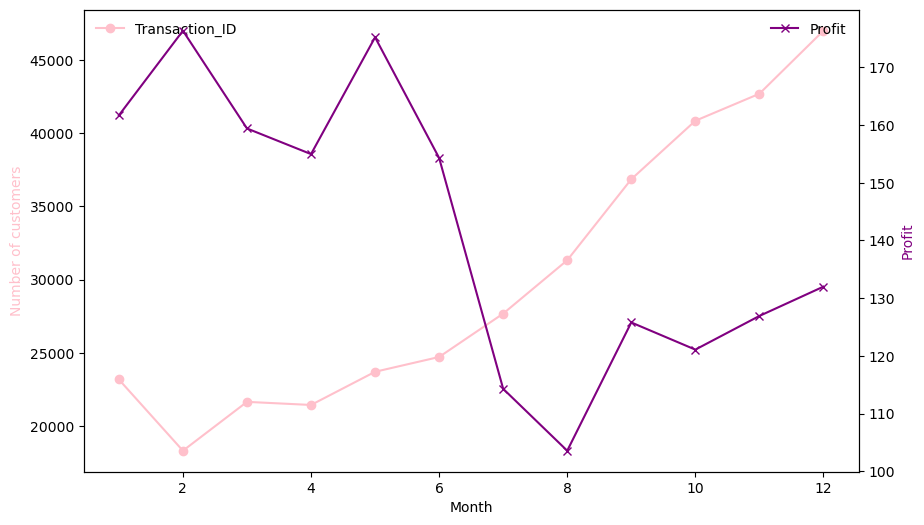

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(result['Transaction_ID'], label = 'Transaction_ID', marker = 'o', color = 'pink')
ax.set_ylabel('Number of customers', color = 'Pink')
ax.set_xlabel('Month' , color = 'Black')
ax1 = ax.twinx()
ax1.plot(result['Profit'], label='Profit', marker='x', color='purple')
ax1.set_ylabel('Profit', color='purple')
ax.legend(loc='upper left', frameon=False)
ax1.legend(loc='upper right', frameon=False)

OBSERVATIONS : 
1. Margin proportionality does not increase with the number of customers. These variables have a moderate negative correlation. 

2. The highest profit was recorded on February and May, least was recordeded on December.

# ATTRIBUTES OF THE CUSTOMER SEGMENTS****

Analysing the customer information for both cab companies.

In [67]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age',
       'Income_(USD/Month)', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Profit'],
      dtype='object')

In [68]:
data['Age'].unique()

array([28, 27, 53, 23, 33, 25, 19, 57, 20, 63, 58, 29, 38, 31, 40, 22, 18,
       34, 21, 24, 44, 30, 26, 46, 62, 47, 43, 32, 60, 52, 51, 48, 39, 45,
       61, 54, 37, 42, 41, 35, 36, 64, 55, 56, 59, 65, 50, 49],
      dtype=int64)

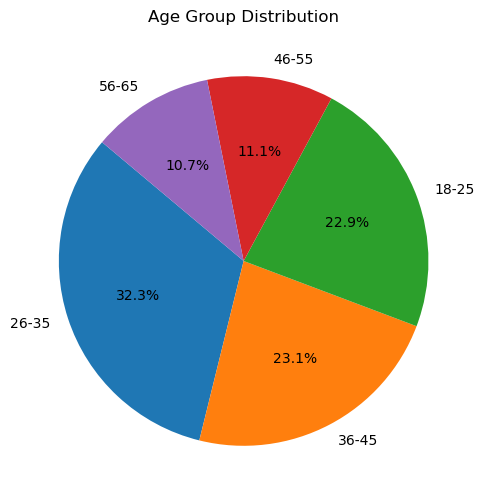

In [69]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of individuals in each age group
age_group_counts = data['Age Group'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.show()

The majority of the cab users are in the age range 26-35. 

In [70]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age',
       'Income_(USD/Month)', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Profit',
       'Age Group'],
      dtype='object')

In [71]:
data[['Transaction_ID', 'Gender']].groupby('Gender').size()

Gender
Female    153480
Male      205912
dtype: int64

The majority number of transactions are done by Male. Also, renaming the income column for convenience.

## DOES GENDER HAS SIGNIFICANT EFFECT ON DISTANCE OF TRIPS TAKEN BY CUSTOMERS?

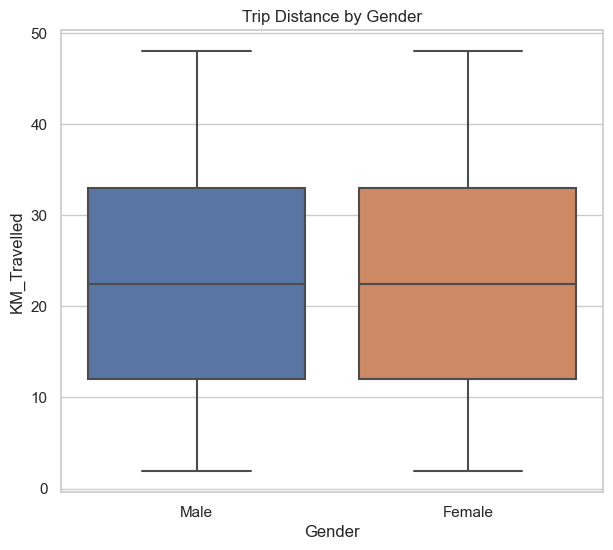

In [94]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))
sns.boxplot(x="Gender", y="KM_Travelled", data=data)
plt.title("Trip Distance by Gender")
plt.xlabel("Gender")
plt.ylabel("KM_Travelled")
plt.show()

From the box plot, we can infer that Gender has no effect on the distance travelled as distance travelled by both the Genders are same. The p-value suggests that there is not a statistically significant difference in trip distances between males and females based on this analysis.

In [95]:
from scipy.stats import ttest_ind

group1 = data[data['Gender'] == 'Male']['KM_Travelled']
group2 = data[data['Gender'] == 'Female']['KM_Travelled']

t_stat, p_value = ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.8095191786399836
P-value: 0.4182171117081914


# DOES CHOICE OF CAB COMPANY AFFECT THE PRICE CHARGED?

In [99]:
comapny_prices = data.groupby('Company')['Price_Charged'].describe()
comapny_prices

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,310.800856,181.995661,15.60,159.97,298.06,441.505,1623.48
Yellow Cab,274681.0,458.181990,288.386166,20.73,226.68,425.06,633.880,2048.03


The choice of cab company does affect the price charged even though both the cab companies minimum prices are relatively lower. The maximum price charged by the yellow cab is 2048.03 and pink can company is 1623.48. The standard deviation if yellow cab is high comapred to the pink cab company suggesting wider range of prices being charged. 

# DOES INCOME AFFECT THE NUMBER OF CUSTOMERS

In [100]:
income_vs_customers = data.groupby('income')['Transaction_ID'].count().reset_index()

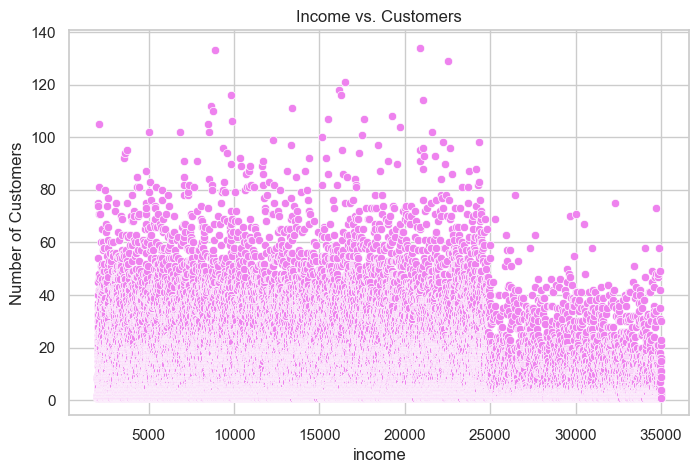

In [108]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=income_vs_customers, x='income', y='Transaction_ID', color = 'violet')
plt.title('Income vs. Customers')
plt.xlabel('income')
plt.ylabel('Number of Customers')
plt.show()

The income does have an effect on the number of customers, from graph we can infer that people with income more than 25000 are less likely to be a cab user compared to people with income below that. 

# MARKET SHARE OF CAB COMPANIES IN EACH CITY

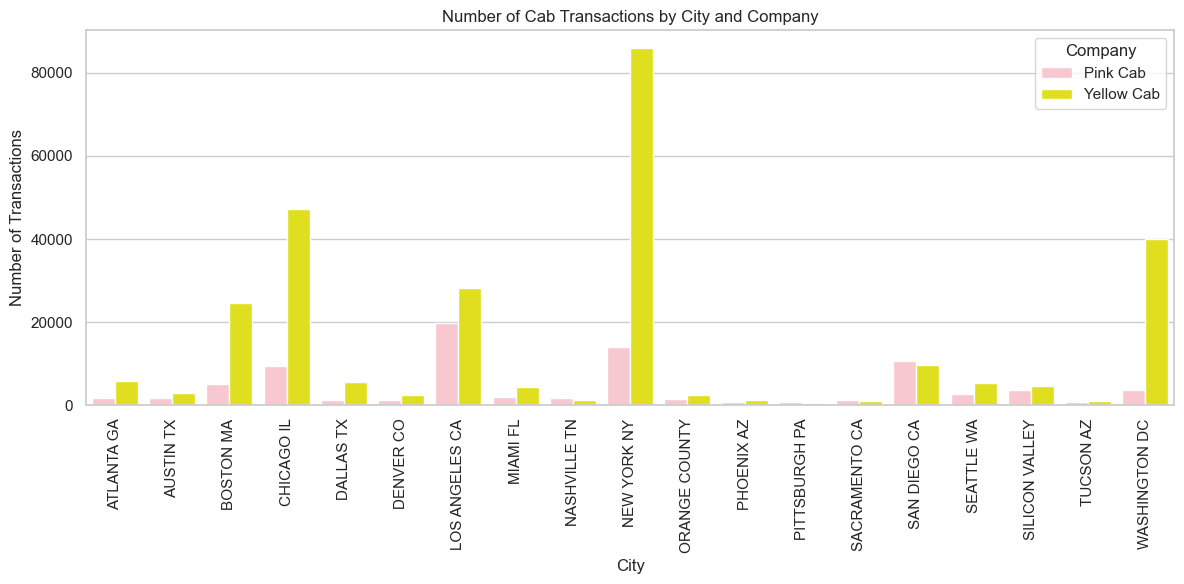

In [143]:
city_company_counts = data.groupby(['City', 'Company'])['Transaction_ID'].count().reset_index()

# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))
custom_palette = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}
sns.barplot(data=city_company_counts, x='City', y='Transaction_ID', hue='Company', palette = custom_palette)
plt.title('Number of Cab Transactions by City and Company')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Company')
plt.tight_layout()
plt.show()

The market share for yellow cab company is high in New york and for pink cab company is high in Los Angeles CA. The population in New York is 8405837 and population in loas angeles ca is 1595037.

In [151]:
city.head(20)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


# OBSERVATIONS

1. Given the peak customer demand during November and December due to holidays and cold weather, it's important to consider a cab company that can efficiently manage increased demand so I think yellow cab company is best in this aspect.

2.Yellow Cab performed exceptionally well in 2017 in terms of customer volume. This cab company can be considered for future investment as they can withstand the demand.

3. Yellow Cab's higher average profit in 2016 and 2017 suggests it might be a more lucrative investment in terms of profitability. 

4.The price charged by each cab company, with Yellow Cab having a wider range and higher maximum price, indicates that Yellow Cab may offer premium services or cater to a broader price range of customers. This is also one good reason to invest in this company as it can cater to people from any economic background.

5.As gender does not affect the customer behaviour, a gender-netrual approach can yield more positive results for the cab companies when it comes to implementing marketing strategies.

6. Investment in Yellow Cab company in New York, you would have a significant market share in a densely populated city, which could lead to a high volume of customers and potential profits.